## 1. Gradient Descent

When performing gradient descent on a large data set, which of the following batch sizes will likely be more efficient and why? 





1.   A small batch or even a batch of one example (SGD).
2.   The full batch.



Answer: When performing gradient descent on a large data set the more efficient batch size is a small batch or a batch of one example (SGD). Finding the gradient of one example is more efficient, and often times just as accurate as finding the gradient of millions of examples. 

## 2. Sigmoid Function

What is the primary purpose of the sigmoid/logistic function in generating the hypothesis function output in logistic regression?

1.   Make the loss/cost function convex
2.   Map the decision boundary value (θᵀX) to a range between (0,1) 
3.   Make the loss/cost function differentiable
4.   Efficient computation of feature weights 

Answer: Map the decision boundary value (θᵀX) to a range between (0,1)

## 3. Hospital Length of Stay Classification (4 points)

We will transform the regression problem of predicting the numerical continuous value length of stay (`LOS`) to a classification problem and fit and evaluate classification models. We will convert the `LOS` numerical continuous variable to a binary label indicating whether the patient was in the hospital for less than a week or not. Tasks performed:

1. Use `los_dataset_cleaned.csv`.  The dataset is cleaned and no further feature creation/engineering and cleaning is required. 

2. Create a binary label `Outcome` to indicate if the patient stayed a week or more in the hospital  i.e.  `if LOS > 6 days` then y=1 (positive label); `if LOS <=6 days` then y=0 (negative label) . Find distribution of this binary `Outcome` label. Split the dataset into features matrix and the outcome variable. 

3. Split the dataset into training and test sets. Use a split of your choice (e.g. 80/20 or 70/30)

4. Fit a Logistic Regression model on the training set and output evaluation metrics (precision, recall and f1-score) for prediction on the test set. Print the classification report for predictions on the test set.

5. Fit one other classifier (Random Forest Classifier or Support Vector Machine) and repeat step 4. Check if performance on the test set improved?

6. Output a feature importance/ranking using any tree based classifier on the training set. 



#### Step 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
from collections import Counter
import pandas as pd
import numpy as np
import collections, numpy
import mlxtend
import matplotlib 
from matplotlib import pyplot 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
matplotlib.rcParams['figure.figsize'] = (10, 10)


from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
from sklearn.metrics import roc_curve, precision_recall_curve, auc

In [ ]:
los_file = "/content/drive/MyDrive/HIDS506 - AI for healthcare/HIDS506 - HW/HIDS506 - HW1/los_dataset_cleaned.csv"
los_df = pd.read_csv('/content/drive/MyDrive/HIDS506 - AI for healthcare/HIDS506 - HW/HIDS506 - HW1/los_dataset_cleaned.csv')
los_df.head()

,LOS,blood,circulatory,congenital,digestive,endocrine,genitourinary,infectious,injury,mental,misc,muscular,neoplasms,nervous,pregnancy,prenatal,respiratory,skin,GENDER,ICU,NICU,ADM_ELECTIVE,ADM_EMERGENCY,ADM_NEWBORN,ADM_URGENT,INS_Government,INS_Medicaid,INS_Medicare,INS_Private,INS_Self Pay,REL_NOT SPECIFIED,REL_RELIGIOUS,REL_UNOBTAINABLE,ETH_ASIAN,ETH_BLACK/AFRICAN AMERICAN,ETH_HISPANIC/LATINO,ETH_OTHER/UNKNOWN,ETH_WHITE,AGE_middle_adult,AGE_newborn,AGE_senior,AGE_young_adult,MAR_DIVORCED,MAR_LIFE PARTNER,MAR_MARRIED,MAR_SEPARATED,MAR_SINGLE,MAR_UNKNOWN (DEFAULT),MAR_WIDOWED
0,1.144444,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
1,5.496528,0.0,4.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
2,6.768056,0.0,2.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
3,2.856944,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0
4,3.534028,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0


In [ ]:
los_df.shape

(51037, 49)

In [ ]:
los_df.isnull().sum()

In [ ]:
los_df.dtypes

#### Step 2

convert outcome to binary values

In [ ]:
los_final = los_df.rename(columns={'LOS':'Outcome'})

In [ ]:
def Outcome_group(x):
  if x > 6:
    return 1
  if x <= 6:
    return 0

In [ ]:
los_final["Outcome"] = los_final["Outcome"].apply(Outcome_group)
los_final.Outcome.value_counts()

1    27542
0    23495
Name: Outcome, dtype: int64

In [ ]:
los_final.head()

,Outcome,blood,circulatory,congenital,digestive,endocrine,genitourinary,infectious,injury,mental,misc,muscular,neoplasms,nervous,pregnancy,prenatal,respiratory,skin,GENDER,ICU,NICU,ADM_ELECTIVE,ADM_EMERGENCY,ADM_NEWBORN,ADM_URGENT,INS_Government,INS_Medicaid,INS_Medicare,INS_Private,INS_Self Pay,REL_NOT SPECIFIED,REL_RELIGIOUS,REL_UNOBTAINABLE,ETH_ASIAN,ETH_BLACK/AFRICAN AMERICAN,ETH_HISPANIC/LATINO,ETH_OTHER/UNKNOWN,ETH_WHITE,AGE_middle_adult,AGE_newborn,AGE_senior,AGE_young_adult,MAR_DIVORCED,MAR_LIFE PARTNER,MAR_MARRIED,MAR_SEPARATED,MAR_SINGLE,MAR_UNKNOWN (DEFAULT),MAR_WIDOWED
0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
1,0,0.0,4.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
2,1,0.0,2.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
3,0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0
4,0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0


Split into features and outcome

In [ ]:
#Preparing the data for the ML models
X_df = los_final.drop('Outcome',axis=1)
y_df = los_final['Outcome']

In [ ]:
X_df.shape, y_df.shape

((51037, 48), (51037,))

In [ ]:
X_df.head()

In [ ]:
y_df.head()

#### Step 3

split dataset into training and test set on a 80/20 basis

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=2)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40829, 48), (10208, 48), (40829,), (10208,))

In [ ]:
X_train.head()

,blood,circulatory,congenital,digestive,endocrine,genitourinary,infectious,injury,mental,misc,muscular,neoplasms,nervous,pregnancy,prenatal,respiratory,skin,GENDER,ICU,NICU,ADM_ELECTIVE,ADM_EMERGENCY,ADM_NEWBORN,ADM_URGENT,INS_Government,INS_Medicaid,INS_Medicare,INS_Private,INS_Self Pay,REL_NOT SPECIFIED,REL_RELIGIOUS,REL_UNOBTAINABLE,ETH_ASIAN,ETH_BLACK/AFRICAN AMERICAN,ETH_HISPANIC/LATINO,ETH_OTHER/UNKNOWN,ETH_WHITE,AGE_middle_adult,AGE_newborn,AGE_senior,AGE_young_adult,MAR_DIVORCED,MAR_LIFE PARTNER,MAR_MARRIED,MAR_SEPARATED,MAR_SINGLE,MAR_UNKNOWN (DEFAULT),MAR_WIDOWED
2741,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,1.0,0.0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
36754,1.0,5.0,0.0,1.0,2.0,3.0,0.0,4.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
45757,2.0,3.0,0.0,1.0,6.0,1.0,1.0,4.0,2.0,1.0,0.0,0.0,3.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
18561,0.0,1.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,1.0,0.0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
32866,1.0,1.0,0.0,1.0,0.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0


In [ ]:
y_train.head()

2741     1
36754    0
45757    1
18561    0
32866    0
Name: Outcome, dtype: int64

In [ ]:
X_test.head()

,blood,circulatory,congenital,digestive,endocrine,genitourinary,infectious,injury,mental,misc,muscular,neoplasms,nervous,pregnancy,prenatal,respiratory,skin,GENDER,ICU,NICU,ADM_ELECTIVE,ADM_EMERGENCY,ADM_NEWBORN,ADM_URGENT,INS_Government,INS_Medicaid,INS_Medicare,INS_Private,INS_Self Pay,REL_NOT SPECIFIED,REL_RELIGIOUS,REL_UNOBTAINABLE,ETH_ASIAN,ETH_BLACK/AFRICAN AMERICAN,ETH_HISPANIC/LATINO,ETH_OTHER/UNKNOWN,ETH_WHITE,AGE_middle_adult,AGE_newborn,AGE_senior,AGE_young_adult,MAR_DIVORCED,MAR_LIFE PARTNER,MAR_MARRIED,MAR_SEPARATED,MAR_SINGLE,MAR_UNKNOWN (DEFAULT),MAR_WIDOWED
14992,0.0,4.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
50568,1.0,1.0,0.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,1.0,0.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
13732,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
2651,1.0,1.0,0.0,2.0,3.0,1.0,1.0,2.0,5.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0
39998,1.0,7.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0


In [ ]:
y_test.head()

14992    1
50568    1
13732    1
2651     1
39998    0
Name: Outcome, dtype: int64

In [ ]:
Counter(y_train), Counter(y_test)

(Counter({0: 18882, 1: 21947}), Counter({0: 4613, 1: 5595}))

#### Step 4

fit/train the training set

In [ ]:
#Fit the model
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

generate predicition on the test set

In [ ]:
#Generate Predictions
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
y_pred_prob = model.predict_proba(X_test)
y_pred_prob

array([[0.39460494, 0.60539506],
       [0.18410404, 0.81589596],
       [0.00603382, 0.99396618],
       ...,
       [0.32900415, 0.67099585],
       [0.71976112, 0.28023888],
       [0.23094644, 0.76905356]])

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm
plot_confusion_matrix(conf_mat=cm, show_absolute=True)

In [ ]:
#Use the confusion matrix function to extract the different types of errors
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(2958, 1655, 1439, 4156)

In [ ]:
#Accuracy 
accuracy = (tp+tn)/(tp+tn+fp+fn)
print('Accuracy: %.3f' % accuracy)

#Recall/Sensitivity/True Positive rate
recall = sensitivity = tpr = tp / (tp + fn)
print('Recall: %.3f' % recall)

#Precision
precision = tp / (tp + fp)
print('Precision: %.3f' % precision)

#Specificity/Negative Recall/ True negative Rate/ 1-False Positive Rate
specificity = tn / (tn + fp)
print('Specificity: %.3f' % specificity)

#F1 Score
f1 = 2*(precision*recall)/(precision+recall)
print('F1: %.3f' % f1)

Accuracy: 0.697
Recall: 0.743
Precision: 0.715
Specificity: 0.641
F1: 0.729


print classification report on test set

In [ ]:
#Function that calculates and print metrics
def show_metrics(y_test, y_pred):
  print('====================')
  accuracy = accuracy_score(y_test, y_pred)
  print('Accuracy: %.3f' % accuracy)
  recall = recall_score(y_test, y_pred)
  print('Recall: %.3f' % recall)
  precision = precision_score(y_test, y_pred)
  print('Precision: %.3f' % precision)
  f1 = f1_score(y_test, y_pred)
  print('F1: %.3f' % f1)
  print('====================')

In [ ]:
show_metrics(y_test, y_pred)

Accuracy: 0.697
Recall: 0.743
Precision: 0.715
F1: 0.729


In [ ]:
print(classification_report(y_test, y_pred))

#### Step 5

Random Forest

In [ ]:
#fit the model
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

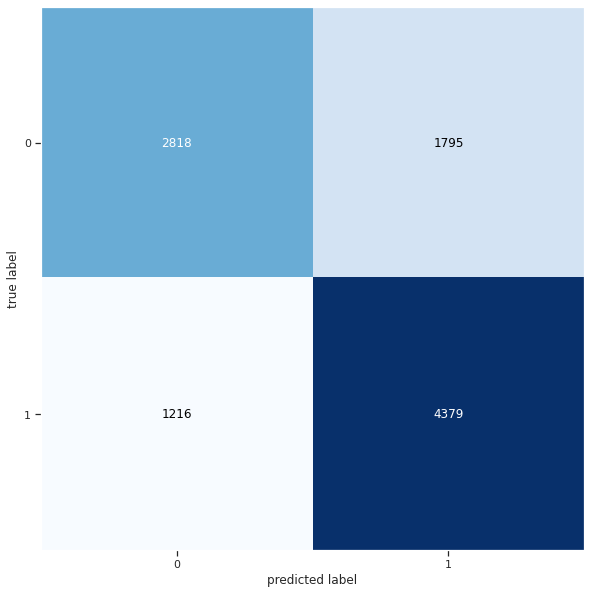

              precision    recall  f1-score   support

           0       0.70      0.61      0.65      4613
           1       0.71      0.78      0.74      5595

    accuracy                           0.71     10208
   macro avg       0.70      0.70      0.70     10208
weighted avg       0.70      0.71      0.70     10208

Accuracy: 0.705
Recall: 0.783
Precision: 0.709
F1: 0.744
AUCROC: 0.775


In [ ]:
#Prediction
predictions_proba = model.predict_proba(X_test)
predictions = model.predict(X_test)

#Getting the confusion matrix for the new 
cm = confusion_matrix(y_test,predictions)
plot_confusion_matrix(conf_mat=cm, show_absolute=True)
plt.show()

#Let's print the classification
print(classification_report(y_test, predictions))

#Getting the metrics
show_metrics(y_test, predictions)

#Compute and print AUC-ROC Curve
roc_auc = roc_auc_score(y_test, predictions_proba[:,1])
print('AUCROC: %.3f' % roc_auc)

The accuracy, recall, and F1 score all improved using the Random Forest Classifier model (RFC). However, the precision did take a slight dip in the RFC model when compared to the original logistic regression model.

#### Step 6

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

In [ ]:
# fit model on training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier()

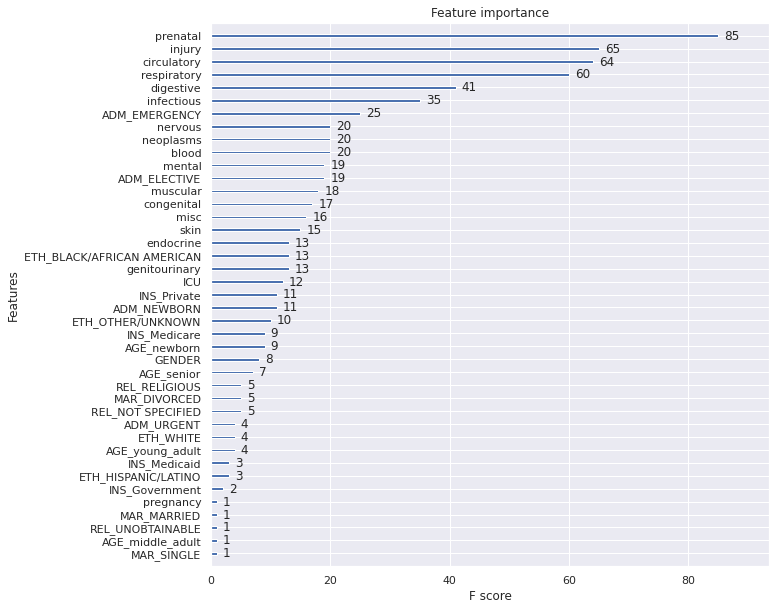

In [ ]:
# plot feature importance
fig, ax = plt.subplots(figsize=(10, 10))
plot_importance(model, ax=ax)
plt.show()